In [1]:
import pandas as pd
df = pd.read_csv('bank.csv',sep=';')  


In [2]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
#Identify the Features data types before entering into the analysis
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
#finding missing values
df.isnull().sum()   #there are no missing values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df1 = df.loc[(df['balance'])&(df['y']=='yes'),['balance','y']] #filtering the customer who subscribed 
df1

,balance,y
30,4189,yes
34,1235,yes
36,229,yes
37,2089,yes
38,3935,yes
...,...,...
4402,39,yes
4407,59,yes
4416,811,yes
4433,-17,yes


In [6]:
df1['balance'].mean()  #average balance  of the customer who susbcribed 

1574.0205761316872

<AxesSubplot:>

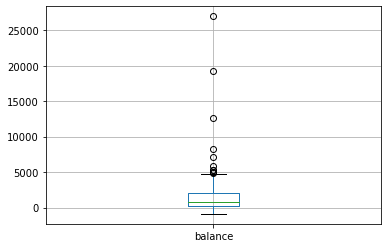

In [7]:
df1.boxplot(column=['balance'])  #plot for the visualization

In [8]:
df2 = df.loc[(df['balance'])&(df['y']=='no'),['balance','y']]  
df2    #filtering the customer who has not subscribed

,balance,y
0,1787,no
1,4789,no
5,747,no
6,307,no
7,147,no
...,...,...
4515,473,no
4516,-333,no
4517,-3313,no
4518,295,no


In [9]:
df2['balance'].mean()  #average balance  of the customer who has not susbcribed 

1531.1637049003768

<AxesSubplot:>

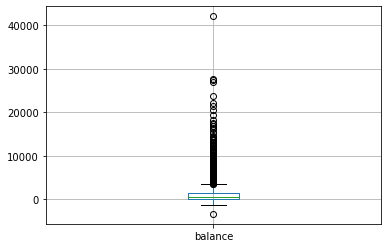

In [10]:
df2.boxplot(column=['balance'])  #plot for the visualization

<AxesSubplot:ylabel='education'>

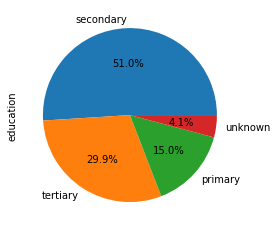

In [11]:
df['education'].value_counts().plot.pie(autopct='%.1f%%')  #labels=labels, autopct='%.1f%%'

In [12]:
season_dict = {'jan': 'Winter',
               'feb': 'Winter',
               'mar': 'Spring', 
               'apr': 'Spring',
               'may': 'Spring',
               'jun': 'Summer',
               'jul': 'Summer',
               'aug': 'Summer',
               'sep': 'Fall',
               'oct': 'Fall',
               'nov': 'Fall',
               'dec': 'Winter'}
season = df['month'].apply(lambda x: season_dict[x])

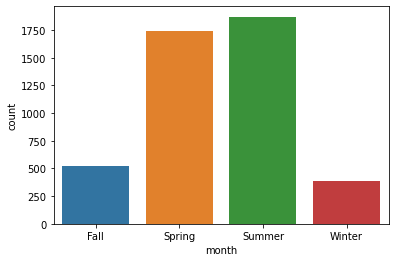

In [13]:
#count plot to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.countplot(x =season, data = df)
 
# Show the plot
plt.show()

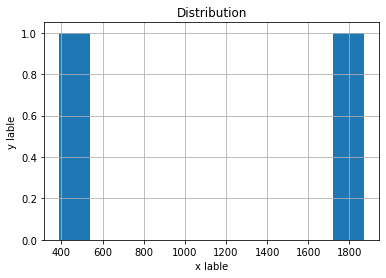

In [14]:
import matplotlib.pyplot as plt
season.value_counts().hist(bins = 20)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

In [1]:
r1 = df.groupby(['pdays','y'])['pdays','y'].count()

NameError: name 'df' is not defined

In [16]:
r1

pdays     y
pdays y               
-1    no    3368  3368
      yes    337   337
 1    yes      2     2
 2    no       7     7
 3    no       1     1
...          ...   ...
 687  no       1     1
 761  yes      1     1
 804  yes      1     1
 808  no       1     1
 871  no       1     1

[371 rows x 2 columns]

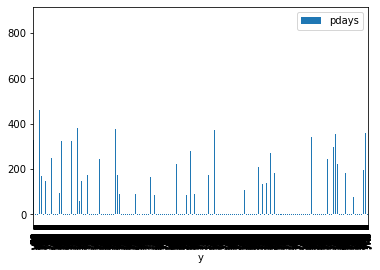

In [17]:
df.plot(x = "y", y = "pdays", kind = "bar")   #checking the pdays effect of subscription using bar plot
plt.show()

In [21]:
#replacing -1 as nan
df['pdays'] = df['pdays'].replace(-1,'')
df['pdays'].value_counts()

       3705
182      23
183      20
363      12
92       12
       ... 
118       1
386       1
63        1
81        1
234       1
Name: pdays, Length: 292, dtype: int64

In [19]:
df.plot(x = "y", y = "pdays", kind = "bar")   #checking the pdays effect of subscription using bar plot
plt.show()

TypeError: no numeric data to plot

In [22]:
df3 = df.loc[(df['balance']<0)&(df['y']=='yes'),['balance','y']]

<AxesSubplot:>

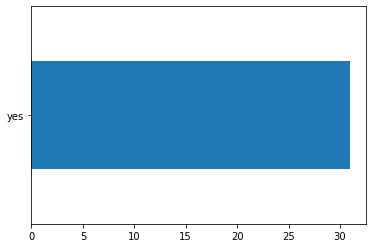

In [23]:
df3['y'].value_counts().plot(kind='barh')

In [33]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


True


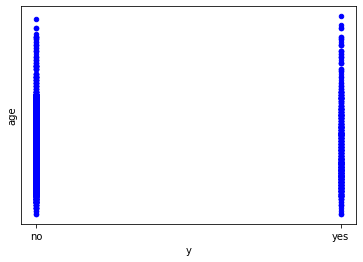

In [36]:
ax1 = df.plot(kind='scatter', x='age', y='balance', color='r')    
ax2 = df.plot(kind='scatter', x='balance', y='y', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='y', y='age', color='b', ax=ax1)

print(ax1 == ax2 == ax3)   #plotting between the three columns

In [37]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


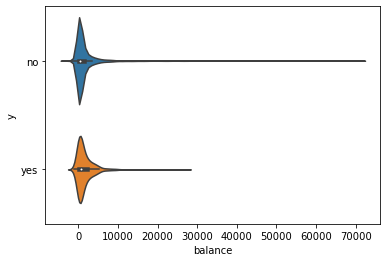

In [51]:
ax = sns.violinplot(x="balance", y="y", data=df) # Q13

<AxesSubplot:xlabel='balance', ylabel='y'>

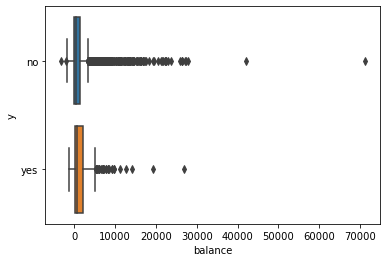

In [53]:
sns.boxplot(x='balance', y='y', data=df)

A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

<AxesSubplot:ylabel='default'>

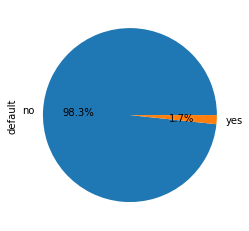

In [55]:
#Q14

df['default'].value_counts().plot.pie(autopct='%.1f%%')  #labels=labels, autopct='%.1f%%'

<AxesSubplot:xlabel='pdays', ylabel='y'>

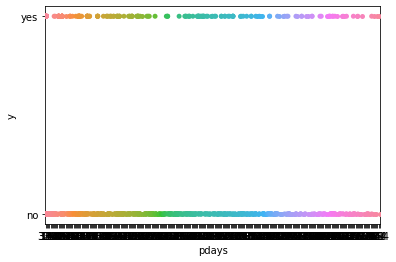

In [62]:
#Q15
sns.stripplot(x="pdays", y="y", data=df, jitter=0.1)

In [65]:
sns.boxplot(x='pdays', y='y', data=df) #we can not use box plot

TypeError: Neither the `x` nor `y` variable appears to be numeric.